In [1]:
%matplotlib inline

import os
import sys
import cv2
import yaml
import torch
import torchvision
from torchvision.ops.boxes import masks_to_boxes

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
sys.path.append('../../../')

%load_ext autoreload
%autoreload 2

    
from video_processing.yolov7.dataset.utils import read_image, inverse_image_n_boxes_to_target_size, image_n_boxes_to_target_size
from video_processing.misc import alpha_bending
from video_processing.yolov7.dataset.penn_fandu_dataset import PennFudanDataset
from video_processing.yolov7.dataset.coords import xyxy2xywh, xywh2xyxy, normalized_xywh2xyxy
from video_processing.yolov7.dataset.modification import random_affine, augment_hsv

In [3]:
hyperparam_file='hyp.scratch.p6.yaml'
with open(hyperparam_file) as f: hyp=yaml.load(f, Loader=yaml.SafeLoader)
    
root='D:/data/PennFudanPed'
dataset=PennFudanDataset(root=root, image_dirname='PNGImages', mask_dirname='PedMasks', hyp=hyp, indices=None, 
                        img_size=1280, augment=True, correct_exif=True,padding_value=(114,114,114))

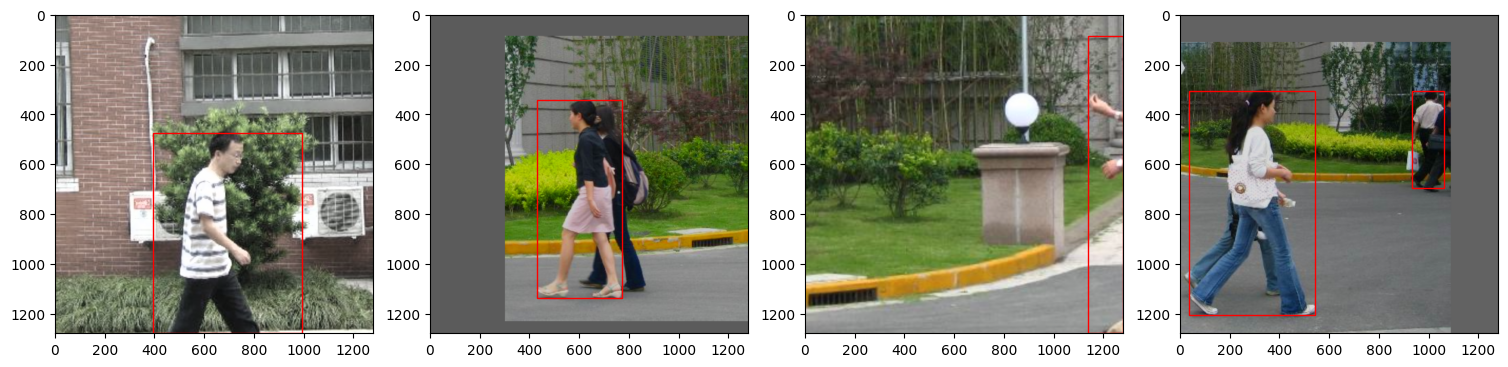

In [4]:
_, ax=plt.subplots(1,4,figsize=(15,5))

for i in range(4):
    image, targets, _, _=dataset[i]
    ax[i].imshow(image.permute(1,2,0)) # CxHxW -> HxWxC
    boxes=normalized_xywh2xyxy(targets[:,2:], w=image.shape[-1], h=image.shape[1])
    #boxes=targets[:,2:]
    for box in boxes:
        rect = patches.Rectangle(box[:2], *(box[2:]-box[:2]), linewidth=1, edgecolor='r', facecolor='none')
        ax[i].add_patch(rect)

plt.tight_layout(pad=0, w_pad=0, h_pad=0)